In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)

%matplotlib inline

In [2]:
suicide = pd.read_csv("D:/pace acedemic/python/final_project/master.csv")
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
len(suicide)

27820

In [5]:
suicide.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

## Number of suicides committed in each country

In [6]:
type(suicide['suicides_no'][0])

numpy.int64

In [7]:
suicide_in_countries = suicide.groupby('country')

In [8]:
suicide_in_countries

In [9]:
country_suicide_series = suicide_in_countries['suicides_no'].sum()

In [10]:
country_suicide_series.head()

country
Albania                 1970
Antigua and Barbuda       11
Argentina              82219
Armenia                 1905
Aruba                    101
Name: suicides_no, dtype: int64

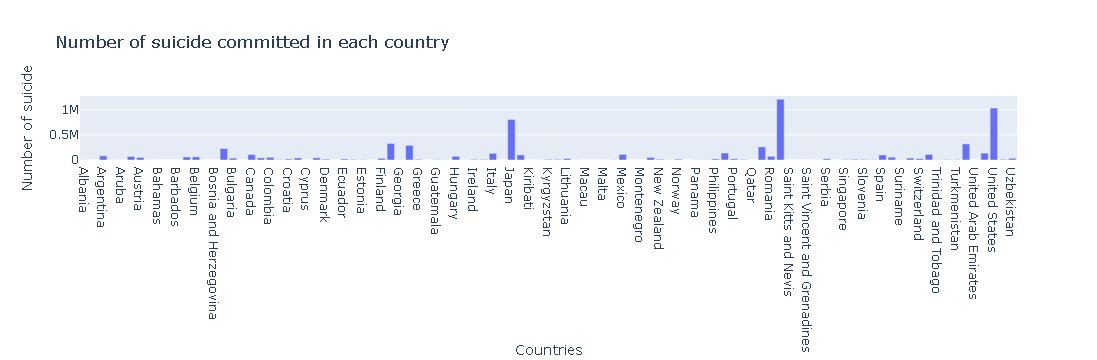

In [11]:
trace1 = go.Bar(
    y=country_suicide_series.values,
    x=country_suicide_series.index,
)

data = [trace1]
layout = go.Layout(
    title="Number of suicide committed in each country",
    xaxis={
        'title':"Countries",
    },
    yaxis={
        'title':"Number of suicide",
    }
)
figure=go.Figure(data=data,layout=layout)
py.offline.iplot(figure)

In [12]:
suicide.year.unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

## Number of suicides genderwise

In [13]:
(suicide['suicides_no'][suicide['sex']=='male']).sum()

5188910

In [14]:
genderwise_suicide = suicide.pivot_table(index='sex' , aggfunc='sum')

In [15]:
genderwise_suicide['suicides_no']

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

In [16]:
suicide['suicides_no'].sum()

6748420

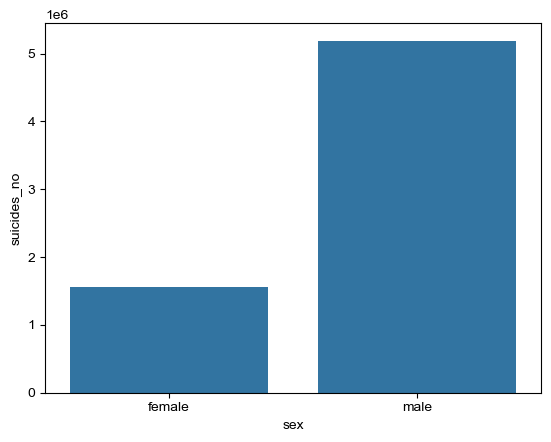

In [17]:
sb.barplot(x=genderwise_suicide.index, y=genderwise_suicide.suicides_no)
sb.set_style('white')
plt.show()

## Number of suicides genderwise in each country

In [18]:
country_wise_gender_suicide_df = pd.DataFrame({
    'country' : suicide.country,
    'sex' : suicide.sex,
    'suicides_no' : suicide.suicides_no
})

In [19]:
country_wise_gender_suicide = country_wise_gender_suicide_df.pivot_table(index='country' , columns='sex' , aggfunc='sum')

In [20]:
country_wise_gender_suicide.iloc[0]

             sex   
suicides_no  female     693
             male      1277
Name: Albania, dtype: int64

In [21]:
# country_wise_gender_suicide.plot.bar(stacked = True , figsize=(30,10) , cmap='coolwarm')

In [22]:
country_wise_gender_suicide.columns = country_wise_gender_suicide.columns.droplevel()

In [23]:
country_wise_gender_suicide.female.head()

country
Albania                  693
Antigua and Barbuda        1
Argentina              18326
Armenia                  495
Aruba                     17
Name: female, dtype: int64

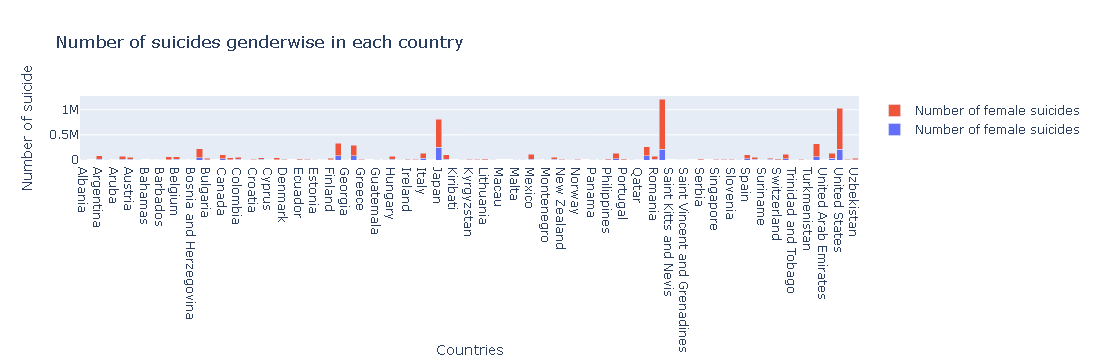

In [24]:
trace1 = go.Bar(
    x=country_wise_gender_suicide.index,
    y=country_wise_gender_suicide.female,
    name='Number of female suicides'
)
trace2 = go.Bar(
    x=country_wise_gender_suicide.index,
    y=country_wise_gender_suicide.male,
    name='Number of female suicides'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title="Number of suicides genderwise in each country",
    xaxis={
        'title':"Countries",
    },
    yaxis={
        'title':"Number of suicide",
    }
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

 ## Suicides committed by various age groups

In [25]:
suicide.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [26]:
agewise_suicides = suicide.pivot_table(index='age' , aggfunc='sum')

In [27]:
agewise_suicides.columns

Index([' gdp_for_year ($) ', 'HDI for year', 'country', 'country-year',
       'gdp_per_capita ($)', 'generation', 'population', 'sex',
       'suicides/100k pop', 'suicides_no', 'year'],
      dtype='object')

In [28]:
agewise_suicides_df = pd.DataFrame({
    'suicides_no' : agewise_suicides['suicides_no']
},index = agewise_suicides.index)

In [29]:
agewise_suicides_df

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


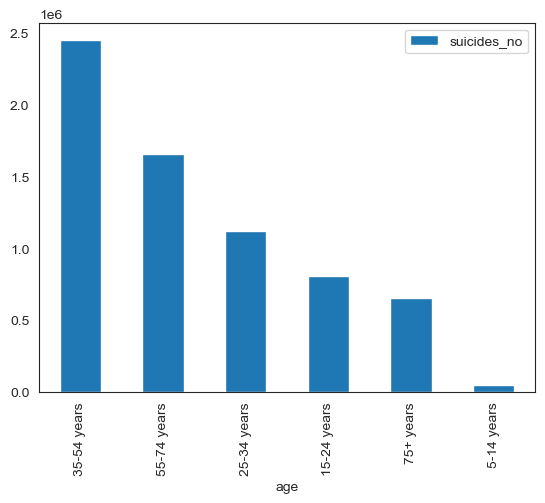

In [30]:
agewise_suicides_df.sort_values(by='suicides_no' , ascending=False).plot.bar()
plt.show()

## Suicides committed by various age groups in male and female

In [31]:
gender_agewise_suicide_df = pd.DataFrame({
    'sex' :suicide.sex,
    'age' : suicide.age,
    'suicide_no' : suicide.suicides_no
})

In [32]:
gender_agewise_suicide = gender_agewise_suicide_df.pivot_table(index='age' , columns='sex' , aggfunc='sum')

In [33]:
gender_agewise_suicide.iloc[0]

            sex   
suicide_no  female    175437
            male      633105
Name: 15-24 years, dtype: int64

In [34]:
#gender_agewise_suicide.plot.pie(subplots=True , figsize=(30,10))

In [35]:
gender_agewise_suicide.columns = gender_agewise_suicide.columns.droplevel()

In [36]:
gender_agewise_suicide.female

age
15-24 years    175437
25-34 years    208823
35-54 years    506233
5-14 years      16997
55-74 years    430036
75+ years      221984
Name: female, dtype: int64

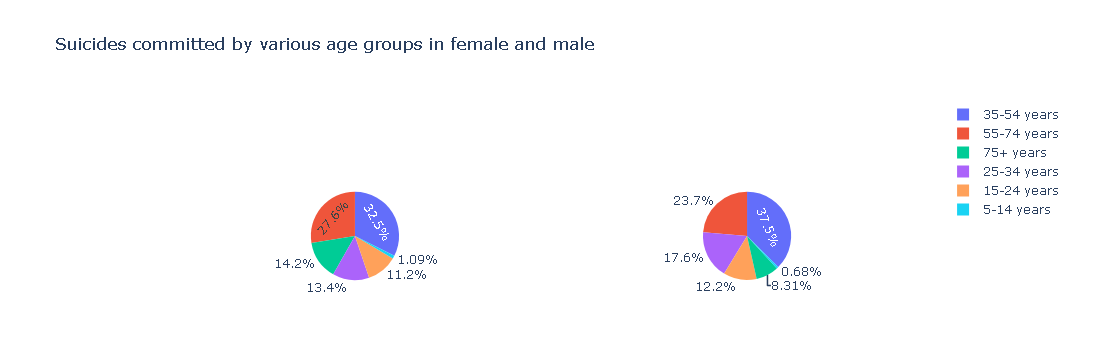

In [38]:
fig = {
    'data' : [
        {
           'labels' : gender_agewise_suicide.index,
           'values' : gender_agewise_suicide.female,
            'type': 'pie',
            'name': 'Female suicides no',
            'domain': {'x': [0, .48],
                       'y': [0, .49]}
        },
        {
           'labels' : gender_agewise_suicide.index,
           'values' : gender_agewise_suicide.male,
            'type': 'pie',
            'name': 'Male suicides no',
            'domain': {'x': [.52, 1],
                       'y': [0, .49]}
        }  
    ],
    'layout': {'title': 'Suicides committed by various age groups in female and male'}
}

py.offline.iplot(fig)

## Suicides committed by various age groups in male and female in each country

In [39]:
country_gender_agewise_suicide_df = pd.DataFrame({
    'country' : suicide.country,
    'sex' : suicide.sex,
    'age' : suicide.age,
    'suicide_no' : suicide.suicides_no
})

In [40]:
country_gender_agewise_suicide_df.head()

,country,sex,age,suicide_no
0,Albania,male,15-24 years,21
1,Albania,male,35-54 years,16
2,Albania,female,15-24 years,14
3,Albania,male,75+ years,1
4,Albania,male,25-34 years,9


In [41]:
country_gender_agewise_suicide = country_gender_agewise_suicide_df.pivot_table(index=['country' , 'age'] , columns='sex' , aggfunc='sum')

In [42]:
country_gender_agewise_suicide.loc['Albania']

suicide_no     
sex             female male
age                        
15-24 years        253  293
25-34 years        139  288
35-54 years        173  418
5-14 years          21   40
55-74 years         68  196
75+ years           39   42

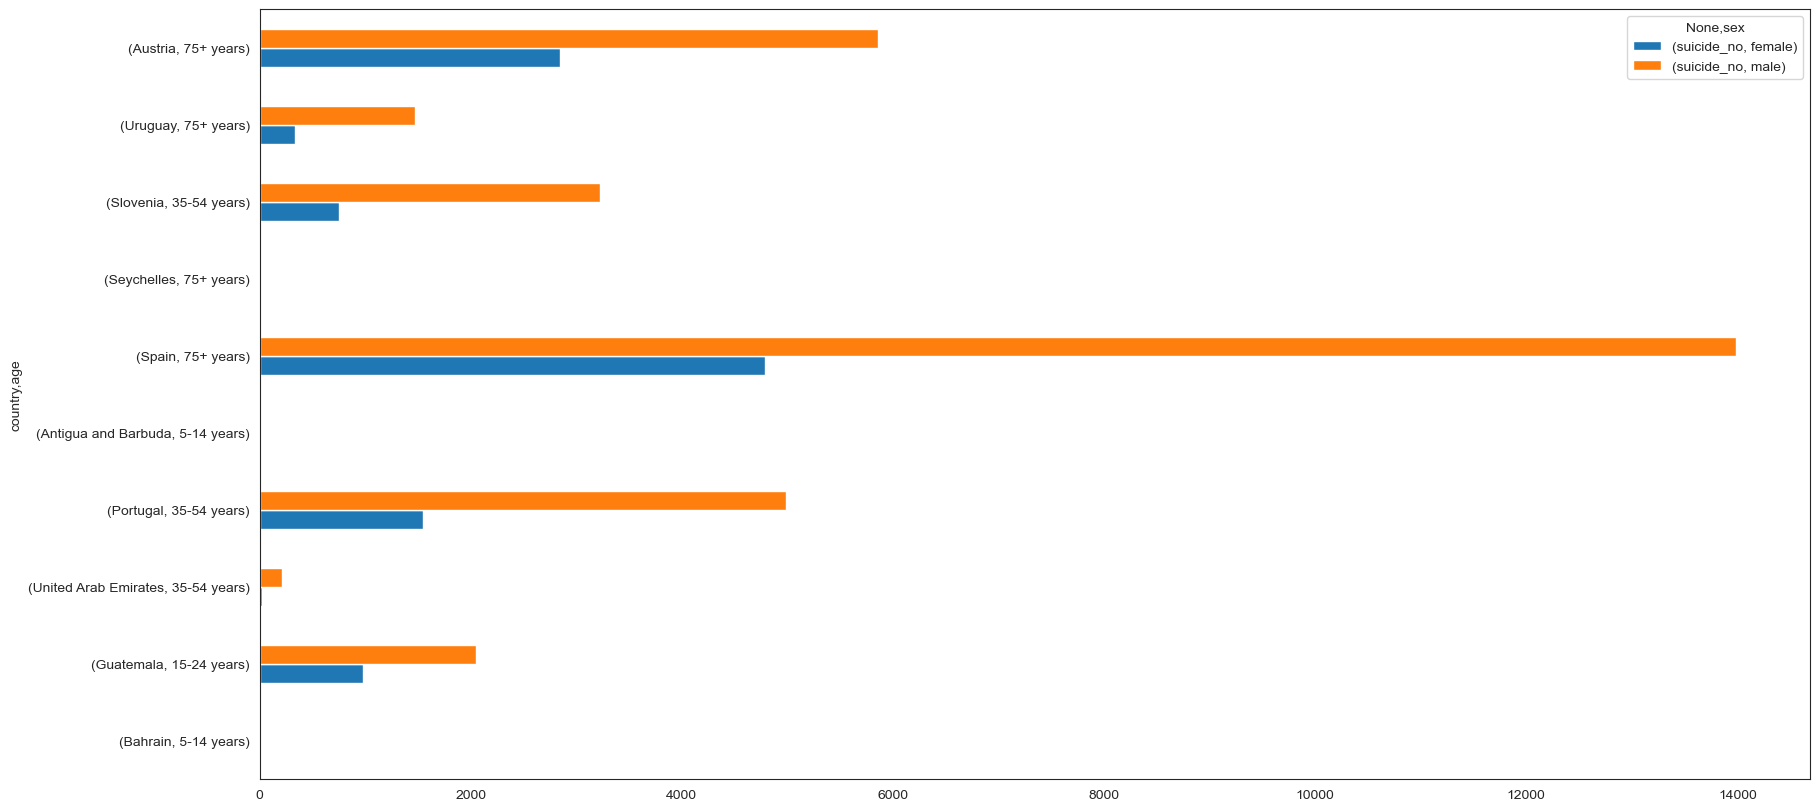

In [43]:
country_gender_agewise_suicide.sample(10).plot.barh(figsize=(20,10))
plt.show()

## Population and suicide rate in yearly basics

In [44]:
suicide.year.unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [45]:
yearly_suicide = suicide.groupby('year').mean(numeric_only=True)

In [46]:
yearly_suicide.head()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
1985,201.498264,1.751042e+06,11.826198,0.699162,6091.229167
1986,209.496528,1.788038e+06,11.423333,NaN,7126.104167
1987,195.743827,1.689861e+06,11.644213,NaN,8712.592593
1988,205.826531,1.792678e+06,12.709405,NaN,9983.857143
1989,256.801282,1.963965e+06,12.879071,NaN,9725.038462


In [47]:
yearly_population = pd.DataFrame({
    'population' : yearly_suicide.population
})
    
yearly_suicide_no = pd.DataFrame({
    'suicide_no' : yearly_suicide.suicides_no
})

In [48]:
yearly_population.head()

,population
year,
1985,1.751042e+06
1986,1.788038e+06
1987,1.689861e+06
1988,1.792678e+06
1989,1.963965e+06


In [49]:
# yearly_population.plot.line(color='red')
# yearly_suicide_no.plot.line()

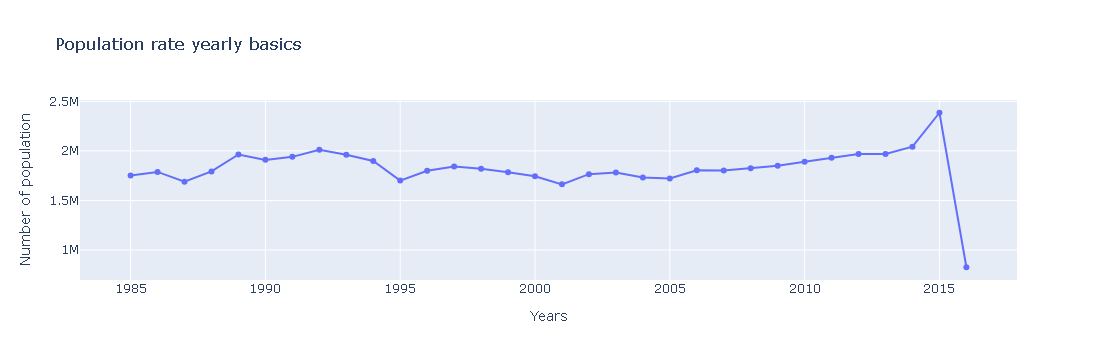

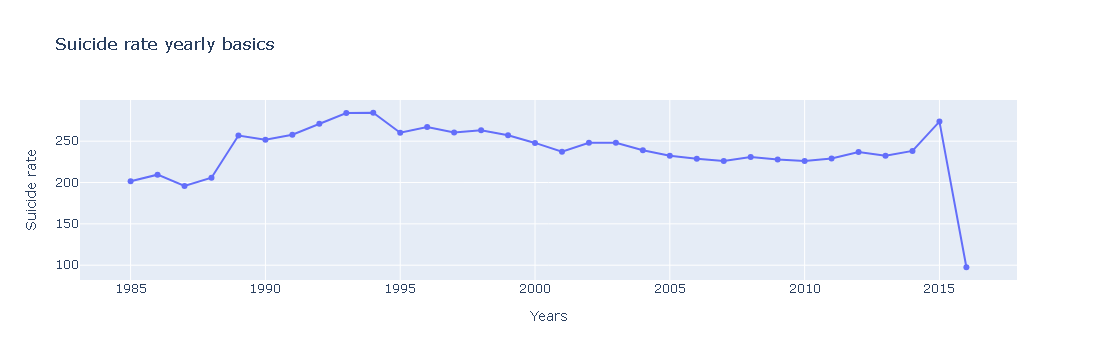

In [50]:
trace0 = go.Scatter(
    x = yearly_population.index,
    y = yearly_population.population,
    mode = 'lines+markers',
)
layout1 = go.Layout(
    title="Population rate yearly basics",
    xaxis={
        'title':"Years",
    },
    yaxis={
        'title':"Number of population",
    }
)

data1 = [trace0]
figure=go.Figure(data=data1,layout=layout1)
py.offline.iplot(figure)

trace1 = go.Scatter(
    x = yearly_suicide_no.index,
    y = yearly_suicide_no.suicide_no,
    mode = 'lines+markers',
)

layout2 = go.Layout(
    title="Suicide rate yearly basics",
    xaxis={
        'title':"Years",
    },
    yaxis={
        'title':"Suicide rate",
    }
)

data2 = [trace1]
figure1=go.Figure(data=data2,layout=layout2)
py.offline.iplot(figure1)

## Merge population and suicide no with yearlywise

In [51]:
merge_pop_suicide = pd.merge(yearly_population , yearly_suicide_no , on='year')

In [52]:
merge_pop_suicide.head()

,population,suicide_no
year,,
1985,1.751042e+06,201.498264
1986,1.788038e+06,209.496528
1987,1.689861e+06,195.743827
1988,1.792678e+06,205.826531
1989,1.963965e+06,256.801282


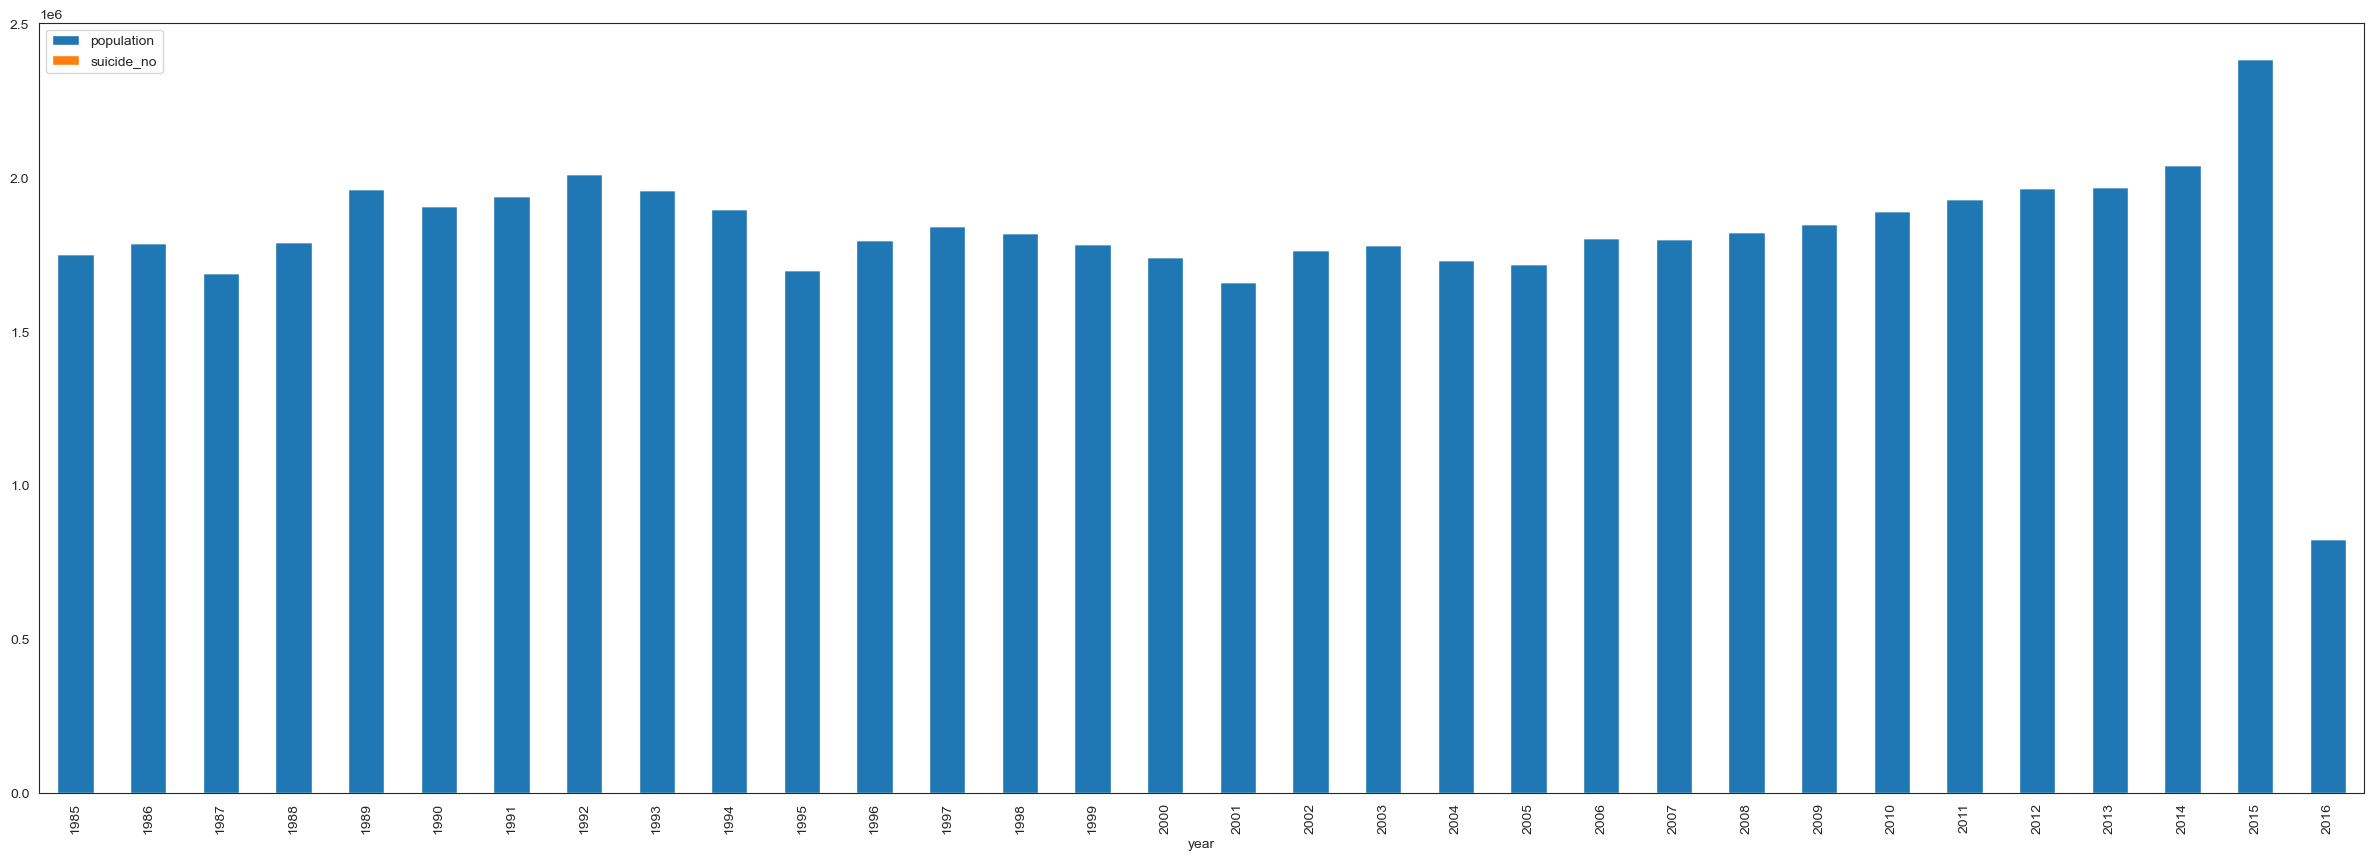

In [53]:
merge_pop_suicide.plot.bar(stacked=True,figsize=(30,10))
plt.show()

## Suicide rate in male and female yearly

In [54]:
yearly_countrywise_gender_suicide_df = pd.DataFrame({
    "year" : suicide.year,
    "sex" : suicide.sex,
    "suicides_no" : suicide.suicides_no
})

In [55]:
yearly_countrywise_gender_suicide = yearly_countrywise_gender_suicide_df.pivot_table(index='year', columns='sex',aggfunc='mean')

In [56]:
yearly_countrywise_gender_suicide.head()

suicides_no            
sex       female        male
year                        
1985  112.774306  290.222222
1986  117.541667  301.451389
1987  108.043210  283.444444
1988  112.295918  299.357143
1989  132.567308  381.035256

In [57]:
x = yearly_countrywise_gender_suicide.index

In [58]:
yearly_countrywise_gender_suicide.columns

MultiIndex([('suicides_no', 'female'),
            ('suicides_no',   'male')],
           names=[None, 'sex'])

In [59]:
yearly_countrywise_gender_suicide.columns = ['female' , 'male']

In [60]:
yearly_countrywise_gender_suicide.head()

,female,male
year,,
1985,112.774306,290.222222
1986,117.541667,301.451389
1987,108.043210,283.444444
1988,112.295918,299.357143
1989,132.567308,381.035256


In [61]:
female = yearly_countrywise_gender_suicide['female']
male = yearly_countrywise_gender_suicide['male']

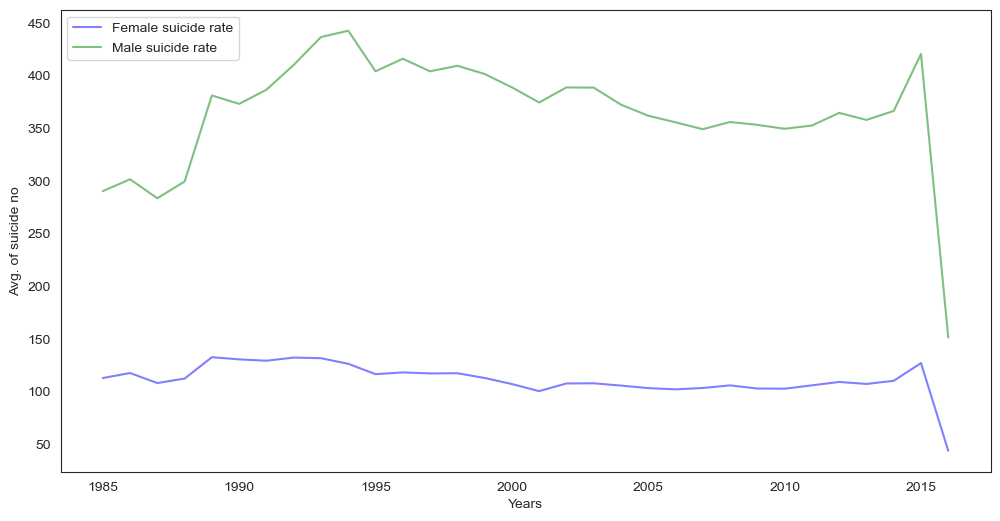

In [62]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, female, color="blue", alpha=0.5 , label='Female suicide rate')
ax.plot(x, male, color="green", alpha=0.5 , label="Male suicide rate")
ax.set_xlabel('Years')
ax.set_ylabel('Avg. of suicide no')
ax.legend()
plt.show()

## Suicide rate over the period of time in each country


In [63]:
country_yearwise_suicide_df  = pd.DataFrame({
    'country' : suicide.country,
    'year' : suicide.year,
    'suicides_no' : suicide.suicides_no
}) 

In [64]:
country_yearwise_suicide = country_yearwise_suicide_df.pivot_table(index='year' , columns='country' , aggfunc='mean')

In [65]:
country_yearwise_suicide.columns = country_yearwise_suicide.columns.droplevel()

In [66]:
country_yearwise_suicide.head()

country,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
year,,,,,,,,,,,,,,,,,,,,,
1985,NaN,0.0,165.666667,NaN,NaN,155.083333,174.250000,NaN,0.083333,0.916667,...,248.500000,2.416667,NaN,NaN,NaN,NaN,425.416667,2453.833333,23.916667,NaN
1986,NaN,0.0,190.333333,NaN,NaN,170.333333,178.250000,NaN,NaN,NaN,...,233.166667,8.666667,NaN,NaN,NaN,NaN,403.250000,2574.333333,21.833333,NaN
1987,6.083333,0.0,190.500000,NaN,NaN,180.333333,172.416667,NaN,0.250000,0.750000,...,252.916667,9.916667,NaN,22.666667,837.500000,NaN,382.833333,2565.250000,21.500000,NaN
1988,5.250000,0.0,196.166667,NaN,NaN,181.000000,154.250000,NaN,NaN,1.166667,...,NaN,13.666667,NaN,22.500000,812.583333,NaN,414.250000,2532.333333,22.333333,NaN
1989,5.666667,0.0,187.250000,NaN,NaN,172.166667,158.166667,NaN,NaN,NaN,...,NaN,14.416667,NaN,21.083333,907.250000,NaN,363.416667,2518.166667,28.666667,NaN


In [67]:
country_yearwise_suicide.interpolate(axis=0 , inplace=True)

In [68]:

country_yearwise_suicide.bfill(axis=0, inplace=True)

In [69]:
country_yearwise_suicide.iloc[:,1].name

'Antigua and Barbuda'

In [70]:
len(country_yearwise_suicide.columns)

101

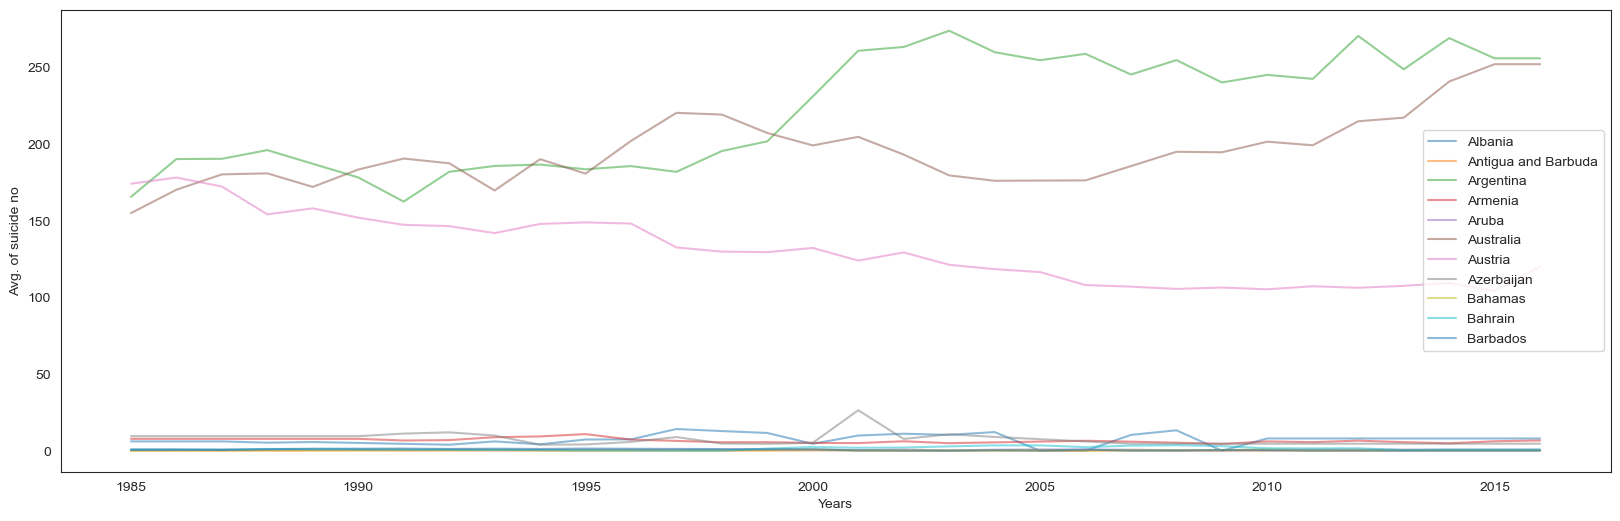

In [71]:
fig, ax = plt.subplots(figsize=(20,6))

l = len(country_yearwise_suicide.columns) 
for i in range(l - 90):
    
    ax.plot(country_yearwise_suicide.index, country_yearwise_suicide.iloc[:,i], alpha=0.5 , label=country_yearwise_suicide.iloc[:,i].name)

ax.legend()
ax.set_xlabel('Years')
ax.set_ylabel('Avg. of suicide no')
plt.show()

In [72]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [73]:
suicide.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

## GDP evalution of each country yearly basis

In [74]:
yearly_country_gdp_df = pd.DataFrame({
    'country' : suicide.country,
    'year' : suicide.year,
    'gdp' : suicide.iloc[:,9]
})

In [75]:
yearly_country_gdp_df = yearly_country_gdp_df.drop_duplicates()

In [76]:
yearly_country_gdp_df.head()

,country,year,gdp
0,Albania,1987,"2,156,624,900"
12,Albania,1988,"2,126,000,000"
24,Albania,1989,"2,335,124,988"
36,Albania,1992,"709,452,584"
48,Albania,1993,"1,228,071,038"


In [77]:
yearly_country_gdp_df = yearly_country_gdp_df.set_index('country')

## Evaluation  GDP of Albania country throughout the period

In [78]:
country_gdp = yearly_country_gdp_df[yearly_country_gdp_df.index == 'Albania']
country_gdp.head()

,year,gdp
country,,
Albania,1987,"2,156,624,900"
Albania,1988,"2,126,000,000"
Albania,1989,"2,335,124,988"
Albania,1992,"709,452,584"
Albania,1993,"1,228,071,038"


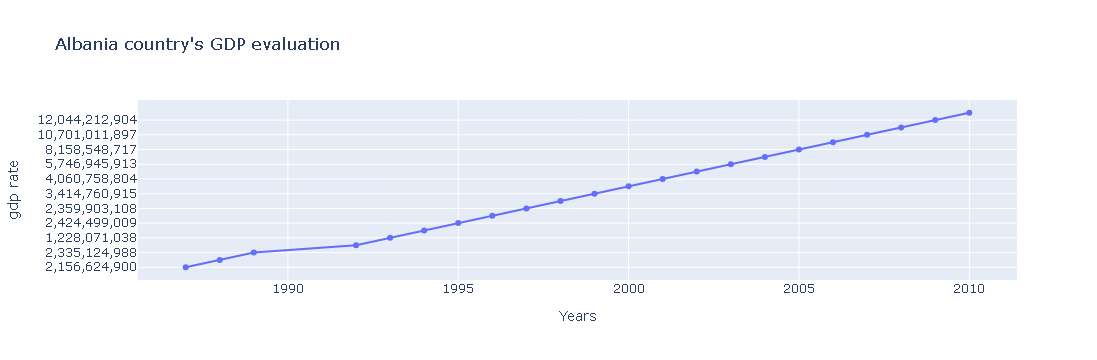

In [79]:
trace = go.Scatter(x=country_gdp.year , y=country_gdp.gdp , name=country_gdp.index[0],mode = 'lines+markers')
layout = go.Layout(
        title="Albania country's GDP evaluation",
        xaxis={
                'title':"Years",
              },
        yaxis={
                'title':"gdp rate",
              }
        )
data = [trace]
fig = go.Figure(data=data , layout=layout)
py.offline.iplot(fig)

## Generation evaluation

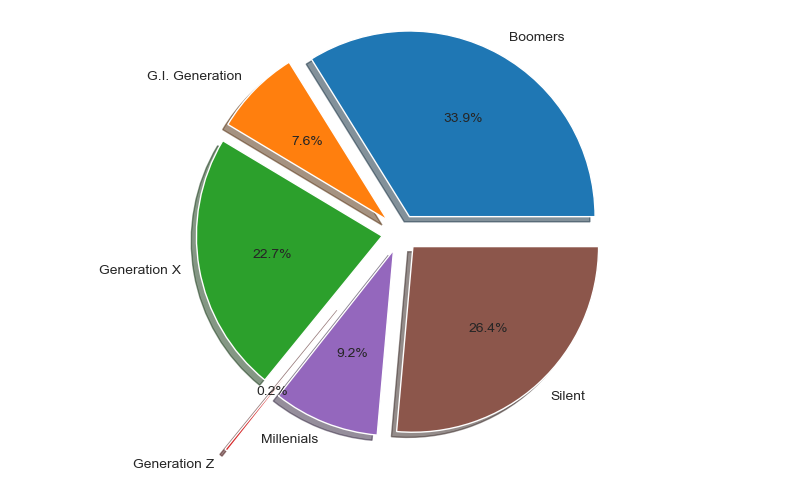

In [80]:

gen_sui = suicide.pivot_table('suicides_no', index='generation', aggfunc='sum')
x = gen_sui.index.values
y = gen_sui.values
y = y.reshape(6,)

fig, ax = plt.subplots(figsize=(10, 6))
explode = (0.1,0.1,0.1,0.5,0.1,0.1)
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal')
plt.show()

## Pairplot through age group

In [81]:
suicide_pairplot = suicide.bfill()
suicide_pairplot.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.619,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.619,"2,156,624,900",796,Silent


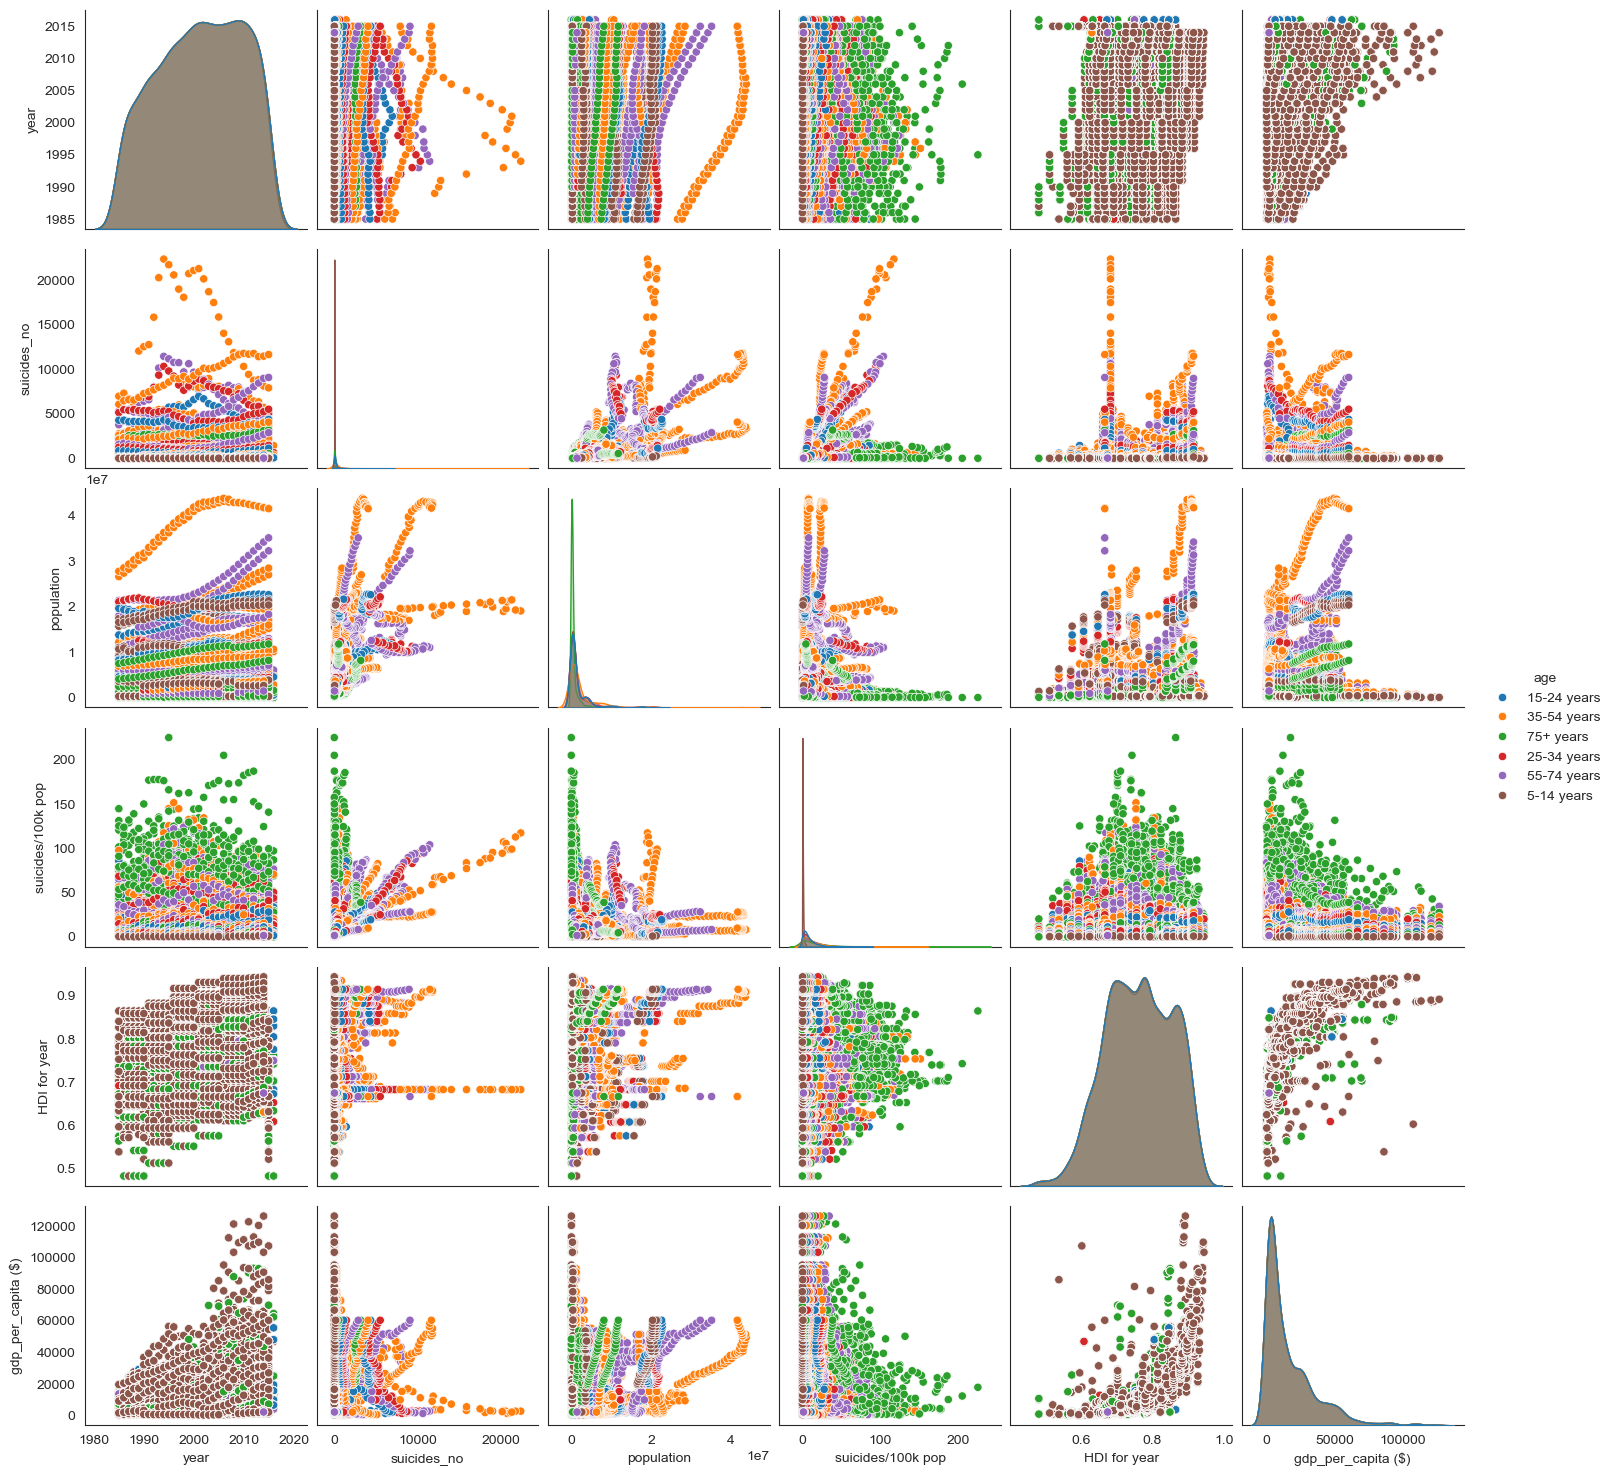

In [82]:
suicide_pairplot = suicide.bfill()
sb.pairplot(suicide_pairplot, hue='age')
plt.show()

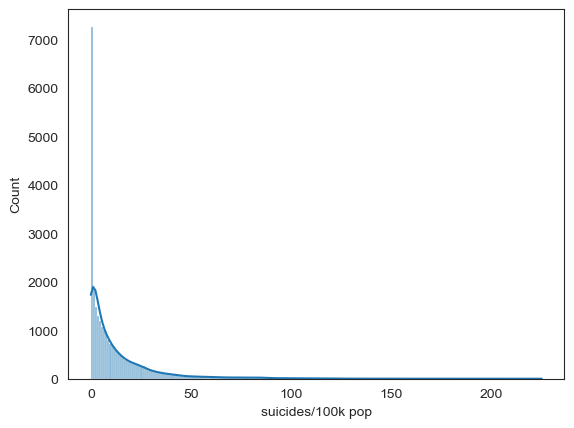

In [83]:
sb.histplot(suicide.iloc[:, 6], kde=True)
plt.show()

Linear Regression

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
suicide = pd.read_csv("D:/pace acedemic/python/final_project/master.csv")

# Data Cleaning
# Fill missing values in 'HDI for year' with the column's mean
suicide['HDI for year'] = suicide['HDI for year'].fillna(suicide['HDI for year'].mean())

# Clean 'gdp_for_year ($)' column by removing commas and converting to float
suicide['gdp_for_year ($)'] = suicide[' gdp_for_year ($) '].replace({',': ''}, regex=True).astype(float)
suicide.drop(columns=[' gdp_for_year ($) '], inplace=True)

# Create a binary target column for logistic regression based on the median of suicide rate
median_suicide_rate = suicide['suicides/100k pop'].median()
suicide['high_suicide_rate'] = (suicide['suicides/100k pop'] > median_suicide_rate).astype(int)

# Encode categorical columns
suicide_encoded = pd.get_dummies(suicide, columns=['sex', 'age', 'generation', 'country'], drop_first=True)

# Prepare feature variables (X) and target variable (y)
X_linear = suicide_encoded.drop(columns=['suicides/100k pop', 'high_suicide_rate', 'country-year'])
y_linear = suicide_encoded['suicides/100k pop']

# Split the data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test_linear)

# Evaluate the model
linear_mse = mean_squared_error(y_test_linear, y_pred_linear)
linear_r2 = r2_score(y_test_linear, y_pred_linear)

# Print the results
print("Linear Regression Results:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R² Score: {linear_r2}")


Linear Regression Results:
Mean Squared Error: 162.56024896894178
R² Score: 0.5348233510034797


Logistic Regression 

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
suicide = pd.read_csv("D:/pace acedemic/python/final_project/master.csv")

# Data Cleaning
# Fill missing values in 'HDI for year' with the column's mean
suicide['HDI for year'] = suicide['HDI for year'].fillna(suicide['HDI for year'].mean())

# Clean 'gdp_for_year ($)' column by removing commas and converting to float
suicide['gdp_for_year ($)'] = suicide[' gdp_for_year ($) '].replace({',': ''}, regex=True).astype(float)
suicide.drop(columns=[' gdp_for_year ($) '], inplace=True)

# Create a binary target column for logistic regression based on the median of suicide rate
median_suicide_rate = suicide['suicides/100k pop'].median()
suicide['high_suicide_rate'] = (suicide['suicides/100k pop'] > median_suicide_rate).astype(int)

# Encode categorical columns
suicide_encoded = pd.get_dummies(suicide, columns=['sex', 'age', 'generation', 'country'], drop_first=True)

# Prepare feature variables (X) and target variable (y)
X_logistic = suicide_encoded.drop(columns=['suicides/100k pop', 'high_suicide_rate', 'country-year'])
y_logistic = suicide_encoded['high_suicide_rate']

# Split the data into training and testing sets
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model with class weights (if the dataset is imbalanced)
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_logistic, y_train_logistic)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_logistic)

# Evaluate the model with zero_division set to 1 to avoid ill-defined precision warning
logistic_accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
logistic_confusion_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
logistic_classification_report = classification_report(y_test_logistic, y_pred_logistic, zero_division=1)

# Print the results
print("Logistic Regression Results:")
print(f"Accuracy: {logistic_accuracy}")
print(f"Confusion Matrix:\n{logistic_confusion_matrix}")
print(f"Classification Report:\n{logistic_classification_report}")


Logistic Regression Results:
Accuracy: 0.4933501078360891
Confusion Matrix:
[[   0 2819]
 [   0 2745]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2819
           1       0.49      1.00      0.66      2745

    accuracy                           0.49      5564
   macro avg       0.75      0.50      0.33      5564
weighted avg       0.75      0.49      0.33      5564



Decision Tree

Root Mean Squared Error (RMSE): 62.70270364069912


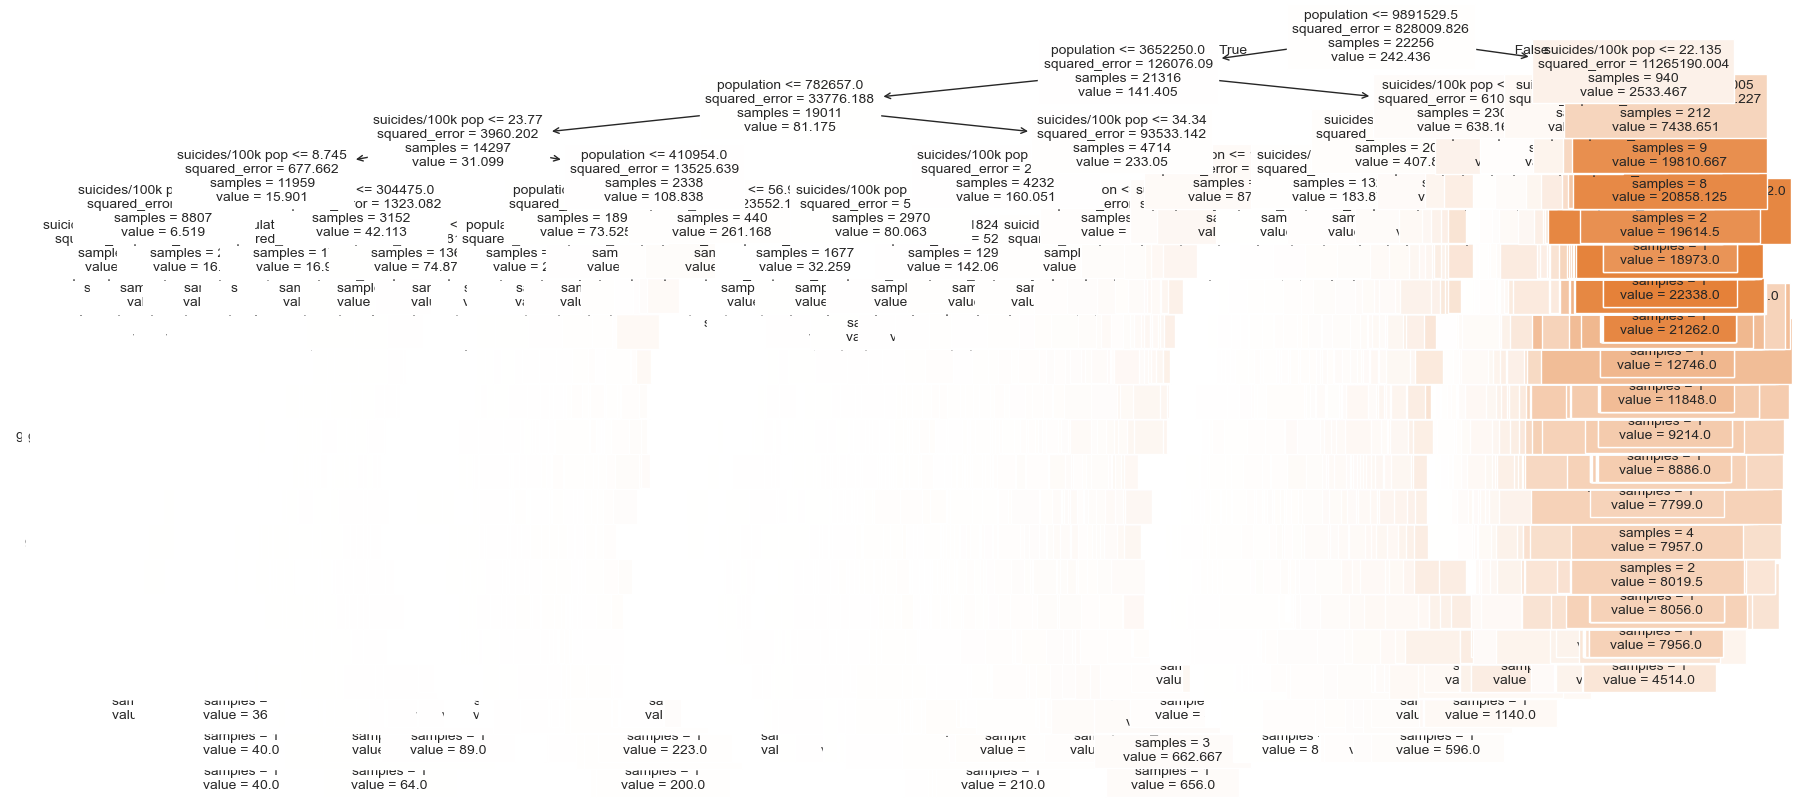

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

# Load the dataset
suicide = pd.read_csv("D:/pace acedemic/python/final_project/master.csv")

# Preprocessing
# Replace commas and convert the GDP column to float
suicide['gdp_for_year ($)'] = suicide[' gdp_for_year ($) '].replace(',', '', regex=True).astype(float)

# Drop irrelevant columns
suicide.drop(['country', 'country-year', ' gdp_for_year ($) '], axis=1, inplace=True)

# Handle missing values (use forward fill)
suicide.ffill(axis=0, inplace=True)

# Convert categorical columns to numerical values
suicide = pd.get_dummies(suicide, columns=['sex', 'age', 'generation'], drop_first=True)

# Define features (X) and target (y)
X = suicide.drop(['suicides_no'], axis=1)
y = suicide['suicides_no']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print RMSE
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, fontsize=10)
plt.show()


Root Mean Squared Error (RMSE): 72.02236964809487


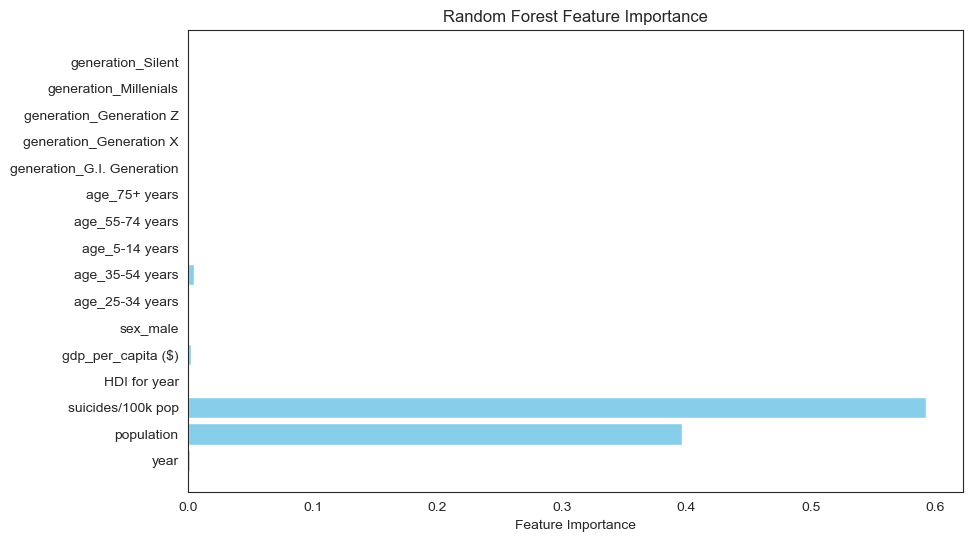

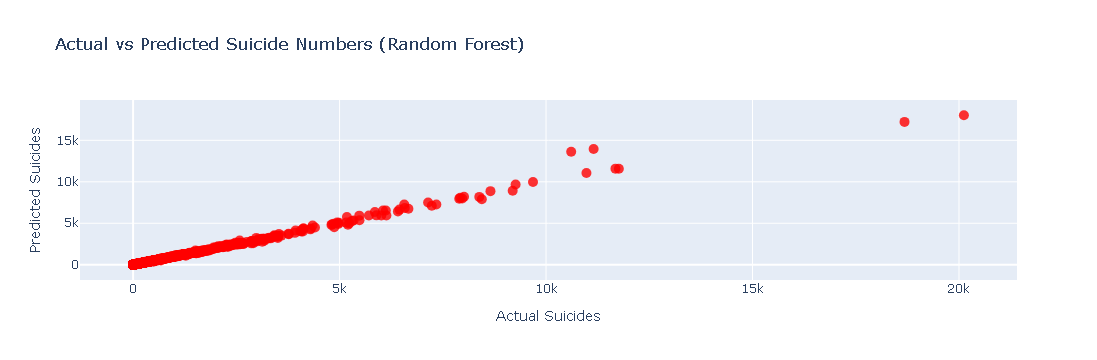

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
suicide = pd.read_csv("D:/pace acedemic/python/final_project/master.csv")

# Preprocessing
# Clean column names
suicide.columns = suicide.columns.str.strip()

# Replace commas and convert the GDP column to float
suicide['gdp_for_year ($)'] = suicide['gdp_for_year ($)'].replace(',', '', regex=True).astype(float)

# Drop irrelevant columns
suicide.drop(['country', 'country-year', 'gdp_for_year ($)'], axis=1, inplace=True)

# Handle missing values (use forward fill)
suicide.ffill(axis=0, inplace=True)

# Convert categorical columns to numerical values
suicide = pd.get_dummies(suicide, columns=['sex', 'age', 'generation'], drop_first=True)

# Define features (X) and target (y)
X = suicide.drop(['suicides_no'], axis=1)
y = suicide['suicides_no']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model using RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print RMSE
print("Root Mean Squared Error (RMSE):", rmse)

# Feature importance (optional)
feature_importances = rf_regressor.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Optional: Plotting Actual vs Predicted values using Plotly for interactivity
import plotly.graph_objs as go
trace1 = go.Scatter(
    x=y_test, y=y_pred, mode='markers', name='Predictions vs Actuals',
    marker=dict(color='rgba(255, 0, 0, .8)', size=10)
)

layout = go.Layout(
    title='Actual vs Predicted Suicide Numbers (Random Forest)',
    xaxis=dict(title='Actual Suicides'),
    yaxis=dict(title='Predicted Suicides')
)

fig = go.Figure(data=[trace1], layout=layout)
import plotly.offline as py
py.offline.iplot(fig)
